# Applying K-Means for Image Quantization

___

## The Problem : Image Quantization

Image quantization is a lossy compression method that replaces a range of similar colors in an image with a single color i.e for compression purpose we assume that this single colour pixel of the image can represent the group of similar coloured pixel in its region.
Quantization reduces the size of the image file since fewer bits are required to
represent the colors. To solve this problem, we will use clustering to discover a
compressed palette for an image that contains its most important colors. We will then
rebuild the image using the discovered compressed palette. 

### * You can use any image to test this quantization example.

**Note**: This example requires the mahotas
image processing library, which can be installed using pip install mahotas.
We will read the image from our root folder using mahotas.imread function. mahotas.imread depends on one of (in order of preference):

1. imread
2. freeimage
3. pillow (PIL)


To install imread:

On **Ubuntu**, run the following commands::

    sudo apt-get install libpng12-dev libtiff4-dev libwebp-dev python-pip python-dev g++
    sudo pip install imread

On **Mac OS**, if using ``port``, run the following commands::

    sudo port install libpng tiff webp
    sudo pip install imread

On **Windows**, use Christoph Gohlke's packages. See:

http://www.lfd.uci.edu/~gohlke/pythonlibs/#imread


To install FreeImage:

You need to have the freeimage installed for imread/imsave (everything else
will work, though, so this error is only triggered when you attempt to use
these optional functions). Freeimage is not a Python package, but a regular
package.

Under Linux, look for a package called `freeimage` in your distribution (it is
actually called `libfreeimage3` in debian/ubuntu, for example).

Under Windows, consider using the third-party mahotas packages at
http://www.lfd.uci.edu/~gohlke/pythonlibs/ (kindly maintained by Christoph
Gohlke), which already package freeimage.

(After downloading the whl file from this site, just run **pip install *yourimreadwheelfile*.whl** in the command prompt from the Python Scripts directory.)   

___

## Managing our imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import mahotas as mh

## Reading and flattening the image

In [14]:
im = mh.imread('images/image.png')
original_img = np.array(im, dtype=np.float64) / 255
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

## Using K-Means Algorithm for clustering

Here we use K-Means to create 64 clusters from a sample of 1,000 randomly selected
colors. Each of the clusters will be a color in the compressed palette.

In [15]:
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=64, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

Next,predicting the cluster assignment for each of the pixels in the original image.

In [16]:
cluster_assignments = estimator.predict(image_flattened)

## Finally, creating the compressed image from the compressed palette and cluster assignments:

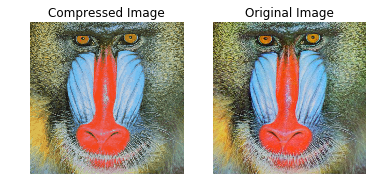

In [17]:
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1

#Plotting the original and Compressed versions of the Image
plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

___
## Summary
In this chapter, we discussed the unsupervised learning task: clustering.
Clustering is used to discover structure in unlabeled data. We used the
K-Means clustering algorithm, which iteratively assigns instances to clusters and
refines the positions of the cluster centroids. While K-Means learns from experience
without supervision, its performance is still measurable (using distortion and the silhouette coefficient for evaluate clusters). In this example, we used K-Means for image quantization, a compression
technique that represents a range of colors with a single color.

____